# Primer acercamiento a Arboles de Decisión con Python y sklearn

En este post usaremos scikit-learn para construir un Árbol de Decisión, que utiliza datos continuos, señales de sensores de una estación meteorológica
<a href="https://github.com/squishpesolis/dataBases/tree/master/clima/daily_weather.csv">daily_weather.csv</a> para predecir el clima.

**Los árboles de Decisión** son un método de aprendizaje automático excepcionalmente útil cuando necesita saber cómo se toman las decisiones.

**En este Post aprenderás sobre.**
- Importación de los datos a un archivo CSV
- Datos faltantes
     - Identificación de datos faltantes
     - Manejo de datos faltantes
 -  Transformación de los datos para árboles de decisión
     - Dividir datos en variables dependientes e independientes
    - Construcción un árbol de decisión

#### NOTA:
Este tutorial se asume que ya conoce los conceptos básicos de la codificación en **Python**.

El archivo <a href="https://github.com/squishpesolis/dataBases/tree/master/clima/daily_weather.csv">daily_weather.csv</a> es un archivo separado por comas que contiene datos de una estación que monitorea el clima en San Diego California. La estación del clima está equipada con sensores que capturan la temperatura ambiente, la presión del aire y la humedad relativa. Estos datos fueron recolectados por un periodo de tres años desde septiembre 2011 hasta septiembre 2014.

# Tarea 1: Importe los módulos que harán todo el trabajo

Lo primero que hacemos es cargar un montón de módulos de Python. Estos módulos nos brindan una funcionalidad adicional para importar los datos, limpiarlos y formatearlos para luego construir, evaluar y dibujar el árbol de decisión.

**NOTA:** Necesitará **Python 3** y tendrá al menos estas versiones para cada uno de los siguientes módulos:
- pandas> = 0.25.1
- sklearn> = 0.22.1

Si instaló **Python 3** con Anaconda (https://www.anaconda.com/) puede verificar qué versión tiene con el comando: `conda list`. Si, por ejemplo, su versión de `scikit-learn` es anterior a 0.22.1, lo más fácil es actualizar todos sus paquetes **Anaconda** con el siguiente comando:` conda update --all` . Sin embargo, si solo desea actualizar `scikit-learn`, puede ejecutar este comando:` conda install scikit-learn = 0.22.1`.

In [153]:
# importación de librerias
import pandas as pd # carga y manipulacoón de datos
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # divir la data en 
# train y test
from sklearn.tree import DecisionTreeClassifier  # arbol de decisión
from IPython.display import Image # Importación de Imagenes
from sklearn.externals.six import StringIO # Lectura y escritura de String
#como archivos
from sklearn.tree import export_graphviz # Exportación del graficos
import pydotplus # Cargar de Graficos en formato DOT
import matplotlib.pyplot as plt # graficar
from sklearn.tree import plot_tree # dibujar el arbol de decisión


# Tarea 2: Importación de Datos
Ahora cargamos el conjunto de datos del clima <a href="https://github.com/squishpesolis/dataBases/tree/master/clima/daily_weather.csv">daily_weather.csv</a>. Este conjunto de datos nos permitirá predecir la humedad del ambiente a las 3 pm, analizando los datos del día anterior hastas las 9am.

In [154]:
data = pd.read_csv('daily_weather.csv')
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [155]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

Caracteristicas del data Frame:

- number: número único para identificar la fila
- air_pressure_9am: presión del aire promedio entre 8:55 am y 9:04 am (Unidades: hectopascales)
- air_temp_9am: temperatura del aire promedio entre 8:55 am y 9:04 am (Unidades: grados F)
- air_wind_direction_9am: dirección promedio del aire entre 8:55 am y 9:04 am(unidades: grados, 0 significa que el aire vino desde el norte y el valor va incrementando como las manecillas del reloj)
- max_wind_direction_9am: dirección de la ráfaga de viento entre 8:55 am y 9:10 am(unidades: grado, 0 empieza en el norte y se va incrementado según las manecillas del reloj)
- max_wind_speed_9am: velocidad del viento promedio entre 8:55 am y 9:04 am(unidades: millas por hora )
- rain_accumulation_9am: cantidad de lluvia acumulada en 24 horas previo a las 9am(unidades: milímetros)
- rain_duration_9am: cuanto tiempo duro la lluvia en 24 horas previo a las 9am (unidad: segundos)
- relative_humidity_9am: humedad relativa promedio entre 8:55 am y 9:04(unidad: porcentaje)
- relative_humidity_3pm: humedad relativa promedio entre 2:55 pm y 3:04(unidad: porcentaje)

 

In [156]:
data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


# Tarea 3: Datos faltantes Parte 1: Identificación de datos faltantes

Desafortunadamente, la mayor parte de cualquier proyecto de análisis de datos es asegurarse de que los datos estén formateados correctamente y corregirlos cuando no lo están. La primera parte de este proceso es tratar con **Datos faltantes**.

In [157]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()


air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
dtype: int64

# Tarea 4: Datos faltantes 
# parte 2: Manejo de datos faltantes

Dado que los árboles de clasificación de scikit-learn no admiten conjuntos de datos con valores faltantes, debemos averiguar qué hacer con estos. Podemos eliminar a estos registros del conjunto de datos de entrenamiento o imputar valores para los datos faltantes.

Antes vamos a eliminar la columna "numer ya que no la necesitamos para el analisis".Eliminaremos las filas con valores faltantes, en lugar de tratar de imputar sus valores

In [158]:
del data['number']

In [159]:
data.shape

(1095, 10)

guardamos el numero de filas antes de eliminar las faltantes

In [160]:
filas_anteriores = data.shape[0]
print("Registros antes dropna()=", filas_anteriores)

Registros antes dropna()= 1095


In [161]:
data = data.dropna()
filas = data.shape[0]
print("Registros despues de dropna()=", filas)
print("Registros Eliminados", filas_anteriores - filas)

Registros despues de dropna()= 1064
Registros Eliminados 31


In [162]:
data_necesaria = data
null_columns_necesesaria=data_necesaria.columns[data_necesaria.isnull().any()]
data_necesaria[null_columns_necesesaria].isnull().sum()


Series([], dtype: float64)

In [163]:
data_necesaria

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


BAM! Hemos verificado que data_necesaria no contiene ningún valor faltante. NOTA: **Ahora estamos listos para formatear los datos para hacer un Árbol de decisión**

# TAREA 5: Formatear datos Parte 1: dividir los datos en variables dependientes e independientes

Ahora que hemos solucionado lo de los datos faltantes, estamos listos para comenzar a formatear los datos para hacer un **Árbol de decisión**.

El primer paso es dividir los datos en dos partes:
1. Las columnas de datos que usaremos para hacer clasificaciones
2. La columna de datos que queremos predecir.

Usaremos la notación convencional de `X` (mayúscula **X**) para representar las columnas de datos que usaremos para hacer clasificaciones y `y` (minúscula **y**) para representar lo que queremos predecir En este caso, queremos predecir *relative_humidity_3pm* (Humedad a las 3pm).


**NOTA:** En el siguiente código estamos usando `copy ()` para copiar los datos *por valor*. Por defecto, pandas usa copy *por referencia*. El uso de `copy ()` asegura que los datos originales `data_necesaria` no se modifiquen cuando modifiquemos` X` o `y`. En otras palabras, si cometemos un error al formatear las columnas para los árboles de decisión, simplemente podemos volver a copiar `data_necesaria`, en lugar de tener que volver a cargar los datos originales y eliminar los valores faltantes, etc.

Escomenos las caracteristicas que se quiere analizar, para realizar la clasificación. En este caso se van escoger todas las caracteristicas de las 9am para predecir que va suceder con la humedad a las 3pm.

In [164]:
feactuares_morning = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am']

In [165]:
X = data_necesaria[feactuares_morning].copy()
X.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
0,918.060000,74.822000,271.100000,295.400000,2.863283,0.0,0.0
1,917.347688,71.403843,101.935179,140.471548,3.533324,0.0,0.0
2,923.040000,60.638000,51.000000,63.700000,22.100967,0.0,20.0
3,920.502751,70.138895,198.832133,211.203341,5.190045,0.0,0.0
4,921.160000,44.294000,277.800000,136.500000,2.863283,8.9,14730.0


Vamos a realizar una transformación, en donde si **relative_humidity_3pm** sobrepasa **24.9** tomara el valor de **1** caso contrario **0**. Y este resultado se lo va almacenar en una nueva columna llamada **high_humidity_label**

In [166]:
data_clean = data_necesaria.copy()
data_clean['high_humidity_label'] = (data_clean['relative_humidity_3pm']>24.99) *1
print(data_clean['high_humidity_label'][:10])

0    1
1    0
2    0
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: high_humidity_label, dtype: int32


In [167]:
y = data_clean['high_humidity_label'].copy()
y.head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int32

# Tarea 5: formatear los datos Parte 2: codificación

Ahora que hemos dividido el set de datos en dos partes, `X`, que contiene los datos que usaremos para hacer clasificaciones, o predecir y` y`, que contiene las clasificaciones conocidas en nuestro conjunto de datos de entrenamiento. Observamos mas a detalle la variables `X`, la lista a continuación nos dice qué el tipo de datos:

In [168]:
X.dtypes

air_pressure_9am          float64
air_temp_9am              float64
avg_wind_direction_9am    float64
max_wind_direction_9am    float64
max_wind_speed_9am        float64
rain_accumulation_9am     float64
rain_duration_9am         float64
dtype: object

In [169]:
y.dtypes

dtype('int32')

# BAM !!!

Ahora, una última cosa antes de construir un árbol de decisión. **y** contiene 0s y 1s.

In [170]:
y.unique()

array([1, 0])


# Tarea 6: Construir un árbol de decisión

Por fin, los datos están formateados correctamente para hacer un **Árbol de decisión**. Ahora simplemente dividimos los datos en conjuntos de **entrenamiento** y **pruebas(Test) **y construimos el árbol.

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

Verificamos el tamanio del dataset "X_train" y "X_test" 

In [172]:
print(X_train.shape)
print(X_test.shape)

(798, 7)
(266, 7)


Salvo que se le indique otra cosa, la función train_test_split añade al bloque de entrenamiento el 75% de los registros, y al bloque de pruebas el 25% restante. Podemos controlar estas cifras con los parámetros **train_size** y **test_size**. Estos parámetros pueden ser números enteros, indicando exactamente el número de registros a incluir, o un número real, en cuyo caso indican el porcentaje del total de registros a incluir.

El parámetro **random_state** simplemente fija una semilla para el generador de números aleatorios, lo que permite reproducir la función.

# Tarea 7: Construir, dibujar e interpretar el árbol de decisión.

In [173]:
clasificador_humedad = DecisionTreeClassifier(max_leaf_nodes=12, random_state=0)
clasificador_humedad.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Vemos en el resumen mostrado que el criterio utilizado para escoger la característica a la que hacer la pregunta y la pregunta en sí es **"gini"** (argumento criterion).

Pero existe tambien **minimo error = error de bayes** o **entropia(entropy)**, estas son tambien conocidas como funciones de impureza.

Lo último que vamos a hacer es dibujar el árbol podado y discutir cómo interpretarlo

### Visualización arbol de decisión con datos de entrenamiento

***sklearn.tree.export_graphviz*** que permite la visualización de un árbol de decisión

Parametros:
- **out_file** indica el fichero o el manejador al que volcar el resultado, en este caso es un objeto de la clase StringIO.
- El parámetro **filled** colorea los nodos generados para indicar en cuáles existe un valor más frecuente que otros (en clasificación) o en cuáles hay valores extremos (en regresión)
- **rounded** muestra los rectángulos representando los nodos con las esquinas redondeadas
- **special_characters**, por último, incluye en el gráfico generado caracteres especiales (el ignorarlos tendría sentido solo para asegurar la compatibilidad con el formato PostScript)
- **feature_names**: nombre de cada uno de las caracteristicas
- **class_names**: Nombres de cada una de las clases objetivo en orden numérico ascendente. Solo es relevante para la clasificación y no es compatible con múltiples salidas. Si es verdadero, muestra una representación simbólica del nombre de la clase.

La función pydotplus.graph_from_dot_data carga un gráfico en formato DOT y, por último, la función Image(graph.create_png()) crea y muestra la imagen generada en formato png.

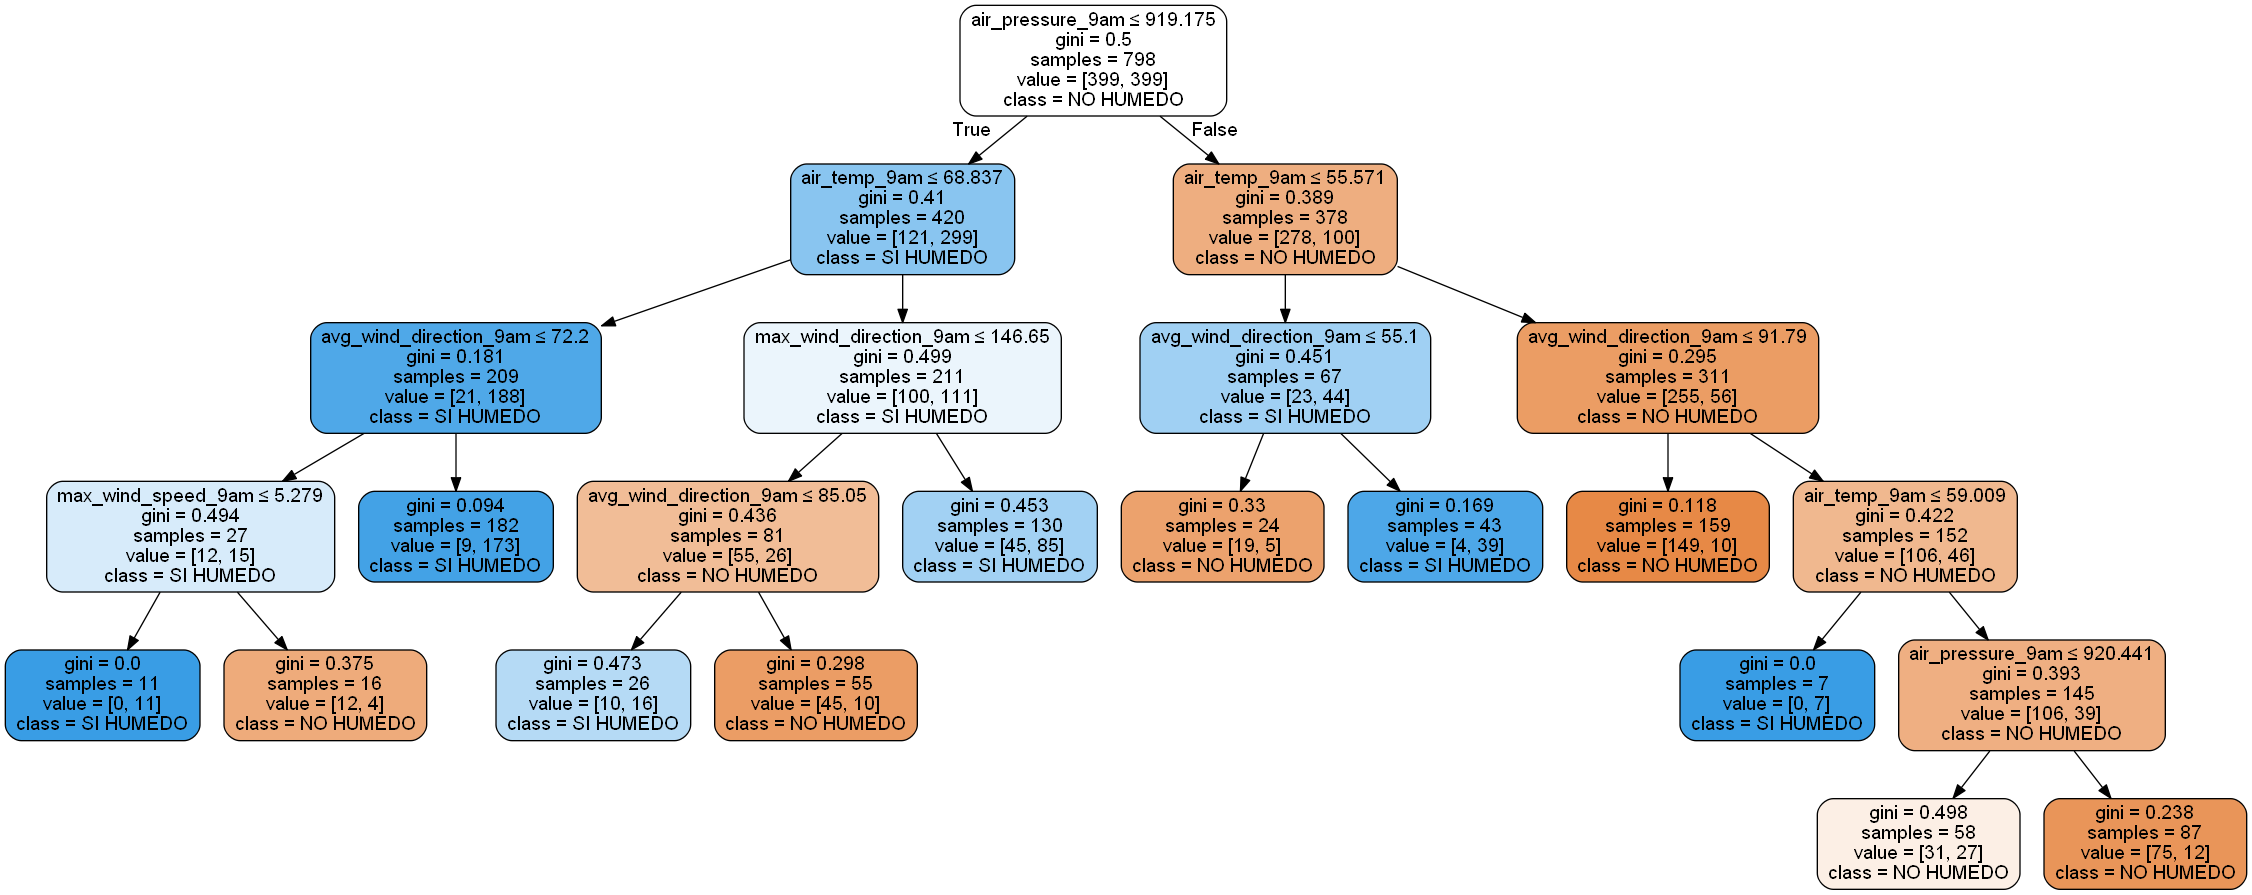

In [174]:
dot_data = StringIO()
export_graphviz(
    clasificador_humedad,
    out_file = dot_data,
    feature_names = X_train.columns,
    filled = True,
    class_names=["NO HUMEDO", "SI HUMEDO"],
    rounded = True,
    special_characters = True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Ahora analicemos cómo interpretar el árbol. En cada nodo, tenemos:


Ahora analicemos cómo interpretar el árbol.

En cada nodo, tenemos:
- La variable (nombre de columna) y el umbral para dividir las observaciones. Por ejemplo, en la raíz del árbol, usamos **air_presusre_9am** para dividir las observaciones. Todas las observaciones con **air_presusre_9am <= 919.75** van a la **izquierda** y todas las observaciones con **air_presusre_9am <= 919.75** van a la **derecha**.

- **gini** es el índice o puntaje de gini para ese nodo
- **samples** nos dicen cuántas muestras hay en ese nodo
- **value** nos dice cuántas muestras en el nodo hay en cada categoría. En este ejemplo, tenemos dos categorías, **SI Humedo** y **NO Humedo**, que se va estar humedo a las 3 pm. El número de pacientes con **NO Humedo** es lo primero porque las categorías están en orden alfabético.Por lo tanto, en la raíz, 399 registros tienen **NO Humedo** y 399 registros tienen **SI Humedo**.
- **class** nos dice qué categoría está más representada en el nodo. En la raíz, dado que 399 registros tienen **NO Humedo** y  399 registros tienen **SI Humedo**, la clase se establece en **NO** ya que estrable en orden alfabetico si son iguales.

Las hojas son como los nodos, excepto que no contienen una variable y un umbral para dividir las observaciones.

Los nodos y las hojas están coloreados por la clase. En este caso, **NO Humedo** tiene diferentes tonos de naranja y **Si HUMEDO** tiene diferentes tonos de azul. Cuanto más oscura es la sombra, menor es el puntaje **gini**, y eso nos dice cuánto se inclina el nodo o la hoja hacia una clase.